## Import Libraries

In [1]:
import pandas as pd

## Read Data

In [2]:
temp_data = pd.read_csv('daily-minimum-temperatures.csv',parse_dates=True,index_col='Date')

In [3]:
temp_data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
temp_data.dtypes

Temp    float64
dtype: object

In [5]:
temp_data.reset_index(inplace=True)

In [6]:
temp_data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
temp_data.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [8]:
temp_data = pd.read_csv('daily-minimum-temperatures.csv',parse_dates=True,index_col='Date')

<Axes: xlabel='Date'>

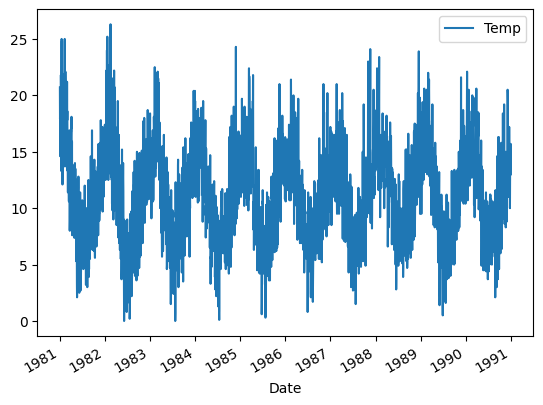

In [9]:
temp_data.plot(kind='line')

In [10]:
temp_data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [11]:
temp_data.reset_index(inplace=True)

In [12]:
grouper = temp_data.groupby(temp_data['Date'].dt.year)

In [13]:
year = pd.DataFrame()
for name, group in grouper:
    year[name]=group['Temp'].values

year

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


In [14]:
import matplotlib.pyplot as plt

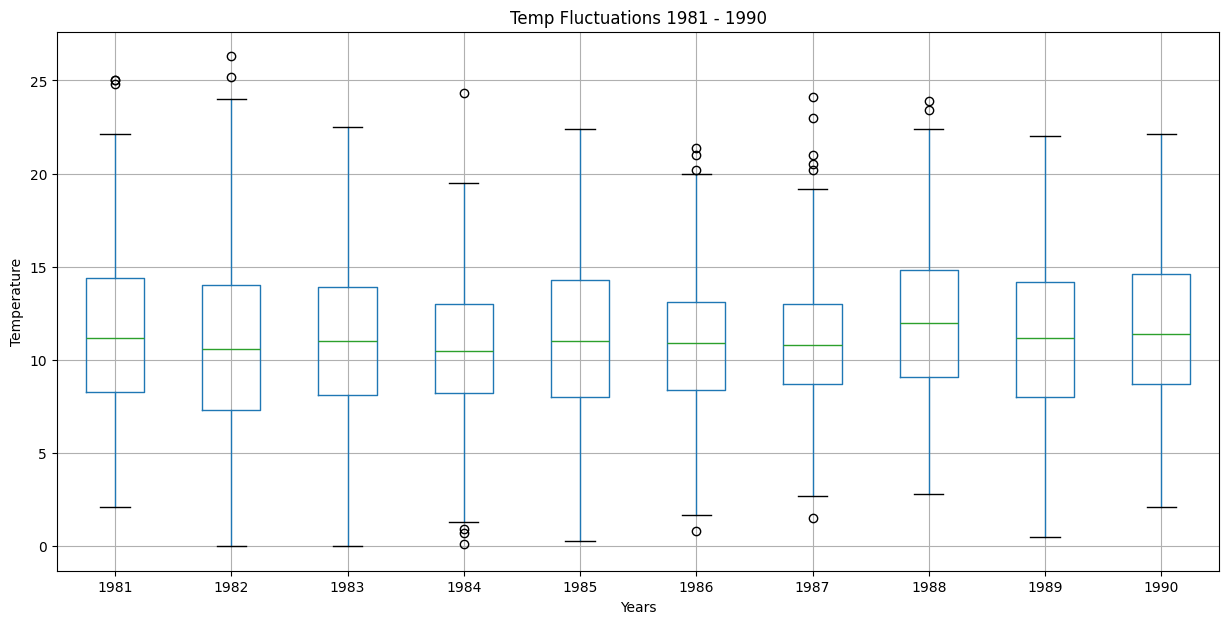

In [15]:
plt.figure(figsize=(15,7))
year.boxplot()
plt.title('Temp Fluctuations 1981 - 1990')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

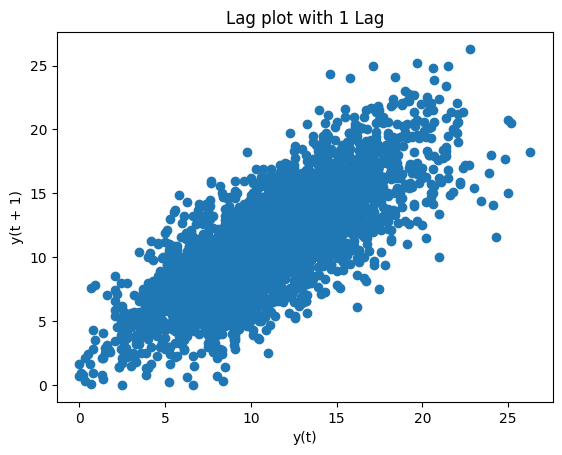

In [16]:
from pandas.plotting import lag_plot

lag_plot(series=temp_data['Temp'],lag=1)
plt.title('Lag plot with 1 Lag')
plt.show()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1500x700 with 0 Axes>

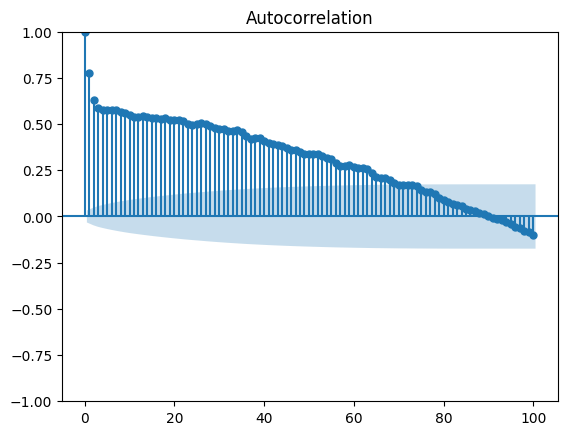

In [18]:
plt.figure(figsize=(15,7))
plot_acf(temp_data['Temp'],lags=100)
plt.show()

## Resampling Techniques

In [19]:
sales = pd.read_csv('sales.csv')

In [20]:
sales.head()

,Month,Sales
0,1990-01-01,266.0
1,1990-02-01,145.9
2,1990-03-01,183.1
3,1990-04-01,119.3
4,1990-05-01,180.3


In [21]:
sales.shape

(36, 2)

In [22]:
sales.dtypes

Month     object
Sales    float64
dtype: object

### Data Preprocessing

In [23]:
sales_new = pd.read_csv('sales.csv',parse_dates=True,index_col='Month')
sales_new.head()

,Sales
Month,
1990-01-01,266.0
1990-02-01,145.9
1990-03-01,183.1
1990-04-01,119.3
1990-05-01,180.3


In [24]:
sales_new.head()

,Sales
Month,
1990-01-01,266.0
1990-02-01,145.9
1990-03-01,183.1
1990-04-01,119.3
1990-05-01,180.3


In [25]:
sales_new.dtypes

Sales    float64
dtype: object

In [26]:
resampled_daily = sales_new.resample('D').mean()

In [27]:
resampled_daily.head(32)

,Sales
Month,
1990-01-01,266.0
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,NaN
1990-01-05,NaN
1990-01-06,NaN
1990-01-07,NaN
1990-01-08,NaN
1990-01-09,NaN


In [28]:
interploated_df = resampled_daily.interpolate('linear')

<Axes: xlabel='Month'>

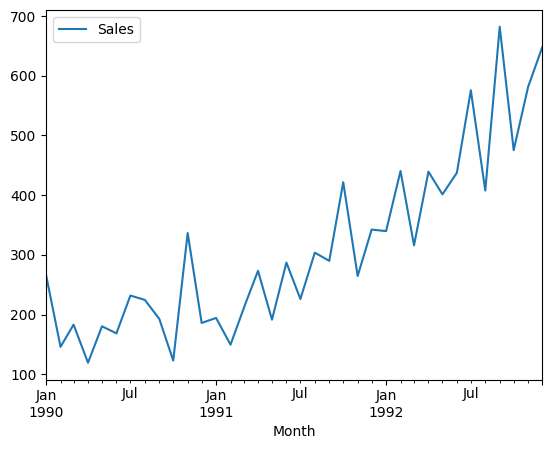

In [29]:
interploated_df.plot(kind='line')

<Axes: xlabel='Month'>

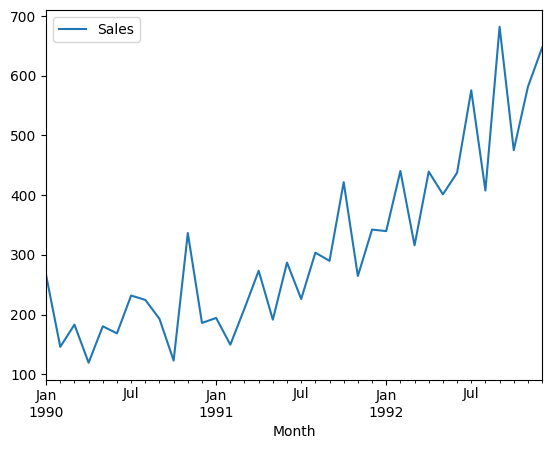

In [30]:
sales_new.plot(kind='line')

In [31]:
sales_new.resample('Q').mean()

C:\Users\Chetan\AppData\Local\Temp\ipykernel_8796\1762356126.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sales_new.resample('Q').mean()


,Sales
Month,
1990-03-31,198.333333
1990-06-30,156.033333
1990-09-30,216.366667
1990-12-31,215.100000
1991-03-31,184.633333
1991-06-30,250.566667
1991-09-30,273.166667
1991-12-31,342.800000
1992-03-31,365.333333
